In [77]:
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [78]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [80]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [81]:
data.isin(['?']).sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [87]:
data1 = data.drop(columns=['Cabin', 'PassengerId', 'Ticket', 'Name',]) 
data1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [119]:
#Import label encoder and encode columns('Sex'. 'Embarked')

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data1['Sex']= label_encoder.fit_transform(data1['Sex']) 

In [120]:
data1['Embarked'] = data1['Embarked'].replace(['C','Q','S'],['Embk_Cherbourg','Embk_Queenstown','Embk_Southampton'])

In [124]:
Embarked_town = pd.get_dummies(data1.Embarked)
Embarked_town.head()

,Embk_Cherbourg,Embk_Queenstown,Embk_Southampton
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [125]:
data2 = data1.join(Embarked_town).drop('Embarked', axis=1)
data2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embk_Cherbourg,Embk_Queenstown,Embk_Southampton
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [126]:
data2.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embk_Cherbourg,Embk_Queenstown,Embk_Southampton
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.188552,0.086420,0.722783
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.391372,0.281141,0.447876
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='Embk_Queenstown', ylabel='Survived'>

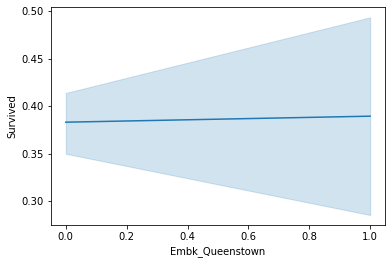

In [135]:
#pd.crosstab(data2.Embk_Queenstown, data2.Survived).plot(kind='bar')
#plt.title('correlation')
#plt.xlabel('Embk_Queenstown')
#plt.ylabel('Survived')
#plt.savefig('Death_diabetes_corr')

#Ploting University Rating w.r.t Chance of Admit
sns.lineplot(data=data2, x="Embk_Queenstown", y="Survived")

In [127]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data2))
z

array([[0.78927234, 0.82737724, 0.73769513, ..., 0.48204268, 0.30756234,
        0.61930636],
       [1.2669898 , 1.56610693, 1.35557354, ..., 2.0745051 , 0.30756234,
        1.61470971],
       [1.2669898 , 0.82737724, 1.35557354, ..., 0.48204268, 0.30756234,
        0.61930636],
       ...,
       [0.78927234, 0.82737724, 1.35557354, ..., 0.48204268, 0.30756234,
        0.61930636],
       [1.2669898 , 1.56610693, 0.73769513, ..., 2.0745051 , 0.30756234,
        1.61470971],
       [0.78927234, 0.82737724, 0.73769513, ..., 0.48204268, 3.25137334,
        1.61470971]])

In [128]:
#Checking for outliers(outliers always have z-scores  above 3)
outliers = list(set(np.where(z > 3)[0]))
len(outliers)

136

In [129]:
#Removing Outliers
Data2 = data2[(z < 3).all(axis=1)]
Data2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embk_Cherbourg,Embk_Queenstown,Embk_Southampton
